In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# DATA CLEANING

In [4]:
df['merchant_long_lat']=df['merchant_long_lat'].astype('str')

In [5]:
df['longitude']=df['long_lat'].apply(lambda x : float(x.split('-')[0]))
df['latitude']=df['long_lat'].apply(lambda x : float(x.split('-')[1]))
df['merchant_longitude']=df['merchant_long_lat'].apply(lambda x : float(x.split('-')[0]))
df['merchant_latitude']=df['merchant_long_lat'].apply(lambda x : float(x.split('-')[-1]))
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,longitude,latitude,merchant_longitude,merchant_latitude
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,153.41,27.95,153.38,27.99
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,153.41,27.95,151.21,33.87
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,151.23,33.94,151.21,33.87
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,153.10,27.66,153.05,26.68
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,153.41,27.95,153.44,28.06


In [6]:
df.drop(['merchant_long_lat', 'long_lat', 'merchant_id', 'extraction', 'transaction_id'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   status              12043 non-null  object        
 1   card_present_flag   7717 non-null   float64       
 2   bpay_biller_code    885 non-null    object        
 3   account             12043 non-null  object        
 4   currency            12043 non-null  object        
 5   txn_description     12043 non-null  object        
 6   merchant_code       883 non-null    float64       
 7   first_name          12043 non-null  object        
 8   balance             12043 non-null  float64       
 9   date                12043 non-null  datetime64[ns]
 10  gender              12043 non-null  object        
 11  age                 12043 non-null  int64         
 12  merchant_suburb     7717 non-null   object        
 13  merchant_state      7717 non-null   object    

In [8]:
df.isnull().mean()

status                0.000000
card_present_flag     0.359213
bpay_biller_code      0.926513
account               0.000000
currency              0.000000
txn_description       0.000000
merchant_code         0.926679
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb       0.359213
merchant_state        0.359213
amount                0.000000
country               0.000000
customer_id           0.000000
movement              0.000000
longitude             0.000000
latitude              0.000000
merchant_longitude    0.359213
merchant_latitude     0.359213
dtype: float64

In [9]:
irr_col=[var for var in df.columns if var in df.columns[df.isnull().mean()>0.9]]
print(irr_col)
df.drop(irr_col, axis=1, inplace=True)

['bpay_biller_code', 'merchant_code']


## Categorical Variables

In [10]:
cat_var=[var for var in df.columns if var in df.columns[df.dtypes=='object']]
cat_var

['status',
 'account',
 'currency',
 'txn_description',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'country',
 'customer_id',
 'movement']

In [11]:
def unique_labels(df, col_list):
    for var in col_list:
        print(var,df[var].nunique(),'\n')
    
unique_labels(df, cat_var)

status 2 

account 100 

currency 1 

txn_description 6 

first_name 80 

gender 2 

merchant_suburb 1609 

merchant_state 8 

country 1 

customer_id 100 

movement 2 



In [12]:
def cardinality(df, col_list):
    var_list=[var for var in col_list if var in df.columns[df[var].nunique()<10]]
    for var in var_list:
        print(var,'\n',df[var].value_counts()/df.shape[0],'\n')
        
cardinality(df, cat_var)

status 
 authorized    0.640787
posted        0.359213
Name: status, dtype: float64 

currency 
 AUD    1.0
Name: currency, dtype: float64 

txn_description 
 SALES-POS     0.326663
POS           0.314124
PAYMENT       0.215893
PAY/SALARY    0.073321
INTER BANK    0.061613
PHONE BANK    0.008387
Name: txn_description, dtype: float64 

gender 
 M    0.52188
F    0.47812
Name: gender, dtype: float64 

merchant_state 
 NSW    0.180105
VIC    0.176949
QLD    0.129204
WA     0.091339
SA     0.034460
NT     0.017022
ACT    0.006062
TAS    0.005646
Name: merchant_state, dtype: float64 

country 
 Australia    1.0
Name: country, dtype: float64 

movement 
 debit     0.926679
credit    0.073321
Name: movement, dtype: float64 



In [13]:
df.drop(['country', 'movement', 'currency'], axis=1, inplace=True)

In [14]:
df.select_dtypes(include='object').head()

,status,account,txn_description,first_name,gender,merchant_suburb,merchant_state,customer_id
0,authorized,ACC-1598451071,POS,Diana,F,Ashmore,QLD,CUS-2487424745
1,authorized,ACC-1598451071,SALES-POS,Diana,F,Sydney,NSW,CUS-2487424745
2,authorized,ACC-1222300524,POS,Michael,M,Sydney,NSW,CUS-2142601169
3,authorized,ACC-1037050564,SALES-POS,Rhonda,F,Buderim,QLD,CUS-1614226872
4,authorized,ACC-1598451071,SALES-POS,Diana,F,Mermaid Beach,QLD,CUS-2487424745


In [15]:
df.select_dtypes(include='object').isnull().mean()

status             0.000000
account            0.000000
txn_description    0.000000
first_name         0.000000
gender             0.000000
merchant_suburb    0.359213
merchant_state     0.359213
customer_id        0.000000
dtype: float64

In [16]:
def fill_missing(df, col):
    df[col] = df[col].fillna('Missing')
    
for var in ['merchant_suburb', 'merchant_state']:
    fill_missing(df, var)

## Numeric variables

In [17]:
num_var = [var for var in df.columns if var not in cat_var]
num_var

['card_present_flag',
 'balance',
 'date',
 'age',
 'amount',
 'longitude',
 'latitude',
 'merchant_longitude',
 'merchant_latitude']

In [18]:
print(max(df['date']))
print(min(df['date']))
print('Time duration :' , max(df['date'])-min(df['date']))

2018-10-31 00:00:00
2018-08-01 00:00:00
Time duration : 91 days 00:00:00


In [19]:
df['month']=pd.DatetimeIndex(df['date']).month
df['weekdays']=pd.DatetimeIndex(df['date']).weekday

In [20]:
def weekdays_flag(x):
    if x < 5:
        return 0
    else:
        return 1
    
df['weekdays_flag']=df['weekdays'].apply(lambda x : weekdays_flag(x))

In [21]:
for var in ['month', 'weekdays_flag']:
    num_var.append(var)
num_var

['card_present_flag',
 'balance',
 'date',
 'age',
 'amount',
 'longitude',
 'latitude',
 'merchant_longitude',
 'merchant_latitude',
 'month',
 'weekdays_flag']

In [22]:
df[num_var].head()

,card_present_flag,balance,date,age,amount,longitude,latitude,merchant_longitude,merchant_latitude,month,weekdays_flag
0,1.0,35.39,2018-08-01,26,16.25,153.41,27.95,153.38,27.99,8,0
1,0.0,21.20,2018-08-01,26,14.19,153.41,27.95,151.21,33.87,8,0
2,1.0,5.71,2018-08-01,38,6.42,151.23,33.94,151.21,33.87,8,0
3,1.0,2117.22,2018-08-01,40,40.90,153.10,27.66,153.05,26.68,8,0
4,1.0,17.95,2018-08-01,26,3.25,153.41,27.95,153.44,28.06,8,0


In [23]:
df.drop('weekdays', axis=1, inplace=True)

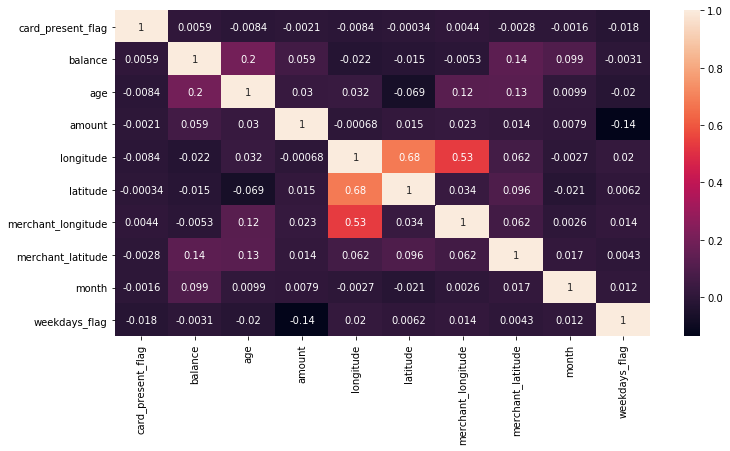

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_var].corr(), annot=True)

In [25]:
df[num_var].isnull().mean()

card_present_flag     0.359213
balance               0.000000
date                  0.000000
age                   0.000000
amount                0.000000
longitude             0.000000
latitude              0.000000
merchant_longitude    0.359213
merchant_latitude     0.359213
month                 0.000000
weekdays_flag         0.000000
dtype: float64

In [26]:
df['card_present_flag']=df['card_present_flag'].fillna(-1)
df['merchant_latitude']=df['merchant_latitude'].fillna(0)
df['merchant_longitude']=df['merchant_longitude'].fillna(0)

# EXPLORATORY DATA ANALYSIS

In [27]:
df.head()

,status,card_present_flag,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,longitude,latitude,merchant_longitude,merchant_latitude,month,weekdays_flag
0,authorized,1.0,ACC-1598451071,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.41,27.95,153.38,27.99,8,0
1,authorized,0.0,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,153.41,27.95,151.21,33.87,8,0
2,authorized,1.0,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,151.23,33.94,151.21,33.87,8,0
3,authorized,1.0,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,153.10,27.66,153.05,26.68,8,0
4,authorized,1.0,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.41,27.95,153.44,28.06,8,0


In [40]:
df.groupby('month').agg(mean=('amount','mean'), median=('amount','median'), count=('amount','count'))

,mean,median,count
month,,,
8,185.121867,28.13,3943
9,182.045903,29.00,4013
10,196.427323,29.00,4087


In [80]:
def top_n_customers(df, month, no_of_customers):
    print(f'Month : {month}')
    table_1=df[df['month']==month].groupby(['customer_id','account']).\
    agg(avg_bal=('balance', 'mean'),
        avg_amt=('amount', 'mean'),
        no_of_trans=('amount','count'),
        total_amt=('amount', 'sum')).sort_values(by='no_of_trans', ascending=False).iloc[:no_of_customers,:]
    table_2=pd.merge(table_1,
                     df[['first_name','customer_id','account']],
                     on=['customer_id','account'],
                     how='inner').drop_duplicates().reset_index(drop=True)
    table_2.rename(columns={'first_name':'Name'}, inplace=True)
    return table_2

In [81]:
top_n_customers(df,8,10)

Month : 8


,customer_id,account,avg_bal,avg_amt,no_of_trans,total_amt,Name
0,CUS-2487424745,ACC-1598451071,1105.237701,45.536043,187,8515.24,Diana
1,CUS-3026014945,ACC-182446574,3029.745045,107.497027,111,11932.17,Tonya
2,CUS-2142601169,ACC-1222300524,1192.015957,64.206809,94,6035.44,Michael
3,CUS-1614226872,ACC-1037050564,1922.881818,72.420114,88,6372.97,Rhonda
4,CUS-3378712515,ACC-4258502723,1694.057952,83.950723,83,6967.91,Kimberly
5,CUS-1196156254,ACC-3485804958,17873.442805,179.216220,82,14695.73,Jessica
6,CUS-51506836,ACC-2673069055,15628.618378,109.467568,74,8100.60,Richard
7,CUS-2695611575,ACC-2890243754,1688.908286,88.865286,70,6220.57,Joseph
8,CUS-809013380,ACC-1990648130,2733.607794,105.385441,68,7166.21,Kaitlyn
9,CUS-127297539,ACC-3689607373,3619.391324,113.411912,68,7712.01,Virginia


In [82]:
top_n_customers(df,9,10)

Month : 9


,customer_id,account,avg_bal,avg_amt,no_of_trans,total_amt,Name
0,CUS-2487424745,ACC-1598451071,2242.639892,37.046216,185,6853.55,Diana
1,CUS-2142601169,ACC-1222300524,824.814231,88.248462,104,9177.84,Michael
2,CUS-1196156254,ACC-3485804958,22436.096633,113.517449,98,11124.71,Jessica
3,CUS-1614226872,ACC-1037050564,3681.143093,66.021753,97,6404.11,Rhonda
4,CUS-2695611575,ACC-2890243754,3727.276333,64.289667,90,5786.07,Joseph
5,CUS-860700529,ACC-1903037542,3416.491798,68.092247,89,6060.21,Jeffrey
6,CUS-3026014945,ACC-182446574,6080.274815,106.361235,81,8615.26,Tonya
7,CUS-127297539,ACC-3689607373,5482.882000,86.044000,80,6883.52,Virginia
8,CUS-1669695324,ACC-3481401842,4704.417179,99.410385,78,7754.01,Tiffany
9,CUS-51506836,ACC-2673069055,18639.625844,128.353766,77,9883.24,Richard


In [83]:
top_n_customers(df,10,10)

Month : 10


,customer_id,account,avg_bal,avg_amt,no_of_trans,total_amt,Name
0,CUS-2487424745,ACC-1598451071,1851.125825,52.634951,206,10842.80,Diana
1,CUS-2142601169,ACC-1222300524,1553.629714,80.792095,105,8483.17,Michael
2,CUS-3378712515,ACC-4258502723,5144.752277,89.831287,101,9072.96,Kimberly
3,CUS-3026014945,ACC-182446574,8808.494300,85.269100,100,8526.91,Tonya
4,CUS-860700529,ACC-1903037542,4671.130330,70.914286,91,6453.20,Jeffrey
5,CUS-51506836,ACC-2673069055,15050.509205,69.510341,88,6116.91,Richard
6,CUS-1669695324,ACC-3481401842,7372.890824,84.030471,85,7142.59,Tiffany
7,CUS-2695611575,ACC-2890243754,2921.620380,119.915570,79,9473.33,Joseph
8,CUS-1614226872,ACC-1037050564,4548.033243,87.964324,74,6509.36,Rhonda
9,CUS-2663907001,ACC-3827517394,44170.162603,175.036575,73,12777.67,Craig
